# SI 221 Assignment 4 : Perceptron

CHEN Eric, POMBET Charles

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

## Synthetic data 

### Question 1

In [2]:
def data_set(sigma):
    mu_0 = [-1, 0]
    mu_1 = [1, 0]
    X, y = make_blobs(n_samples=200, centers=[mu_0, mu_1], cluster_std=[sigma] * 2)
    return X,y

In [3]:
def heaviside(x):
    if (x <= 0):
        return 0
    else:
        return 1

In [4]:
def perceptron(X, y, eta=1, nb_iter=1):
    X = np.hstack((X, np.ones((X.shape[0], 1))))
    w = np.zeros(X.shape[1])
    for j in range(nb_iter):
        for i in range(X.shape[0]):
            d = y[i]
            y_pred = heaviside(np.dot(np.transpose(w), X[i]))
            if ((d-y_pred) != 0):
                w = w + eta*(d-y_pred)*X[i]
    return w

In [5]:
def predict(X, w):
    data = np.hstack((X, np.ones((X.shape[0],1))))
    y_pred = np.array([heaviside(np.dot(np.transpose(w), x)) for x in data])
    return y_pred

In [6]:
def compute_error(X, y, w):
    error = 0
    y_pred = predict(X, w)
    for i in range(X.shape[0]):
        d = y[i]
        if (y_pred[i] != d):
            error += 1
    return error/X.shape[0]

In [7]:
def compute_std(error, avg_error):
    std = (sum([(error[i]-avg_error)**2 for i in range(len(error))])/len(error))**0.5
    return std

In [8]:
sigma_set = [0.05, 0.25, 0.50, 0.75]
error_set = []
std_set = []
for sigma in sigma_set:
    err = []
    for i in range(50):
        X,y = data_set(sigma)
        w = perceptron(X, y)
        error = compute_error(X, y, w)
        err.append(error)
    avg_error = sum(err)/50
    std = compute_std(err, avg_error)
    error_set.append(avg_error)
    std_set.append(std)
print("Error : ")
print(error_set)
print(" ")
print("Standard deviation : ")
print(std_set)

Error : 
[0.0, 0.0, 0.037099999999999994, 0.13060000000000002]
 
Standard deviation : 
[0.0, 0.0, 0.025789338882569287, 0.043446979181526534]


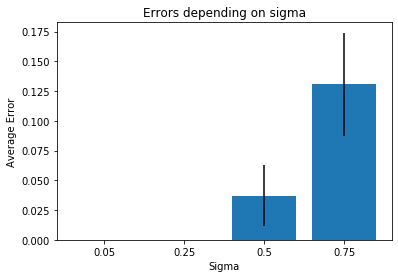

In [9]:
plt.figure()
plt.bar(np.arange(len(sigma_set)), error_set, yerr=std_set)
plt.title('Errors depending on sigma')
plt.xlabel('Sigma')
plt.ylabel('Average Error')
plt.xticks(np.arange(len(sigma_set)), sigma_set)
plt.show()

**We can note that when $\sigma^{2}$ is high, the average error is bigger than for a smaller $\sigma^{2}$. As a result, it is more difficult to separate the data.**

### Question 2

In [10]:
def random_label(y, p):
    y_new = []
    for label in y:
        rand = np.random.random_sample()
        if rand < p:
            y_new.append((label+1)%2)
        else:
            y_new.append(label)
    return y_new

In [11]:
p_set = [0, 0.05, 0.1, 0.2]
error_set = []
std_set = []
for p in p_set:
    err = []
    for i in range(50):
        X, y = data_set(0.15)
        y = random_label(y, p)
        w = perceptron(X, y)
        error = compute_error(X, y, w)
        err.append(error)
    avg_error = sum(err)/50
    std = compute_std(err, avg_error)
    error_set.append(avg_error)
    std_set.append(std)
print("Error : ")
print(error_set)
print(" ")
print("Standard deviation : ")
print(std_set)

Error : 
[0.0, 0.07729999999999998, 0.24730000000000005, 0.33309999999999995]
 
Standard deviation : 
[0.0, 0.10590660980316571, 0.22234030223960752, 0.1373167506169586]


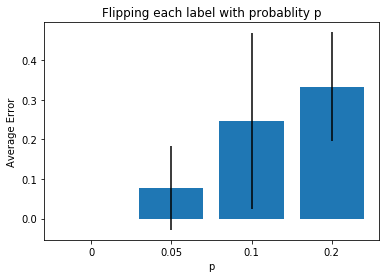

In [12]:
plt.figure()
plt.bar(np.arange(len(p_set)), error_set, yerr=std_set)
plt.title('Flipping each label with probablity p')
plt.xlabel('p')
plt.ylabel('Average Error')
plt.xticks(np.arange(len(p_set)), p_set)
plt.show()

## Image data : LANDSTAT on Tarascon

imz2mat : version janvier 2018.  Fichier à ouvrir : data/landsattarasconC4.ima
Dans ximaread : image monocanal
Dans ximaread : lecture du canal 0/1
image en .ima
image en .ima
image en .ima  512   512   canaux: 1  verif :  0
lecture de  data/landsattarasconC4.ima  en quelconque 512 512 1  offset  0 >B 1  complex 0 blocksize 262144
Données réelles. Nouvelle version de imz2mat  >B
Affichage d'une image reelle
Image seuillee : valmoy (86.344) + 3.000 sigma  (0.,152.41)
plt.show dans visusar : image 512 x 512


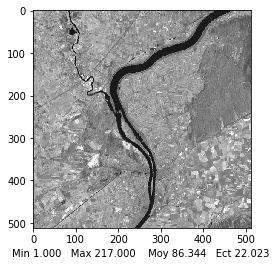

array([[ 74.,  82., 107., ...,  79.,  74.,  94.],
       [ 96., 111., 116., ...,  84.,  77.,  99.],
       [ 81., 109., 117., ...,  90.,  86.,  91.],
       ...,
       [ 78.,  82.,  80., ...,  61.,  69.,  65.],
       [ 81.,  76.,  78., ...,  57.,  58.,  65.],
       [ 83.,  81.,  84., ...,  57.,  54.,  65.]])

In [13]:
import tiilab
img = tiilab.imz2mat("data/landsattarasconC4.ima")
tiilab.visusar(img[0])

### Labeling data

*For the following question, we have replaced the label values by 0 and 1 instead of 1 and 2.*

In [14]:
def create_labels(image):
    n = image.shape[0]
    p = image.shape[1]
    label = np.zeros((n,p))
    for i in range(n):
        for j in range(p):
            if (image[i,j] < 30):
                label[i,j] = 0
            else:
                label[i,j] = 1
    return label

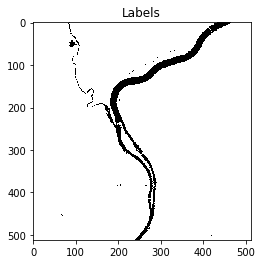

In [15]:
image = img[0]
label = create_labels(image)
plt.title("Labels")
plt.imshow(label)
plt.show()

### Implementing the perceptron's error-correction rule

In [16]:
def error_correction(image, label, eta, epochs):
    X = image.flatten().reshape(-1,1)
    y = label.flatten().reshape(-1,1)
    w = perceptron(X,y,eta,epochs)
    y_pred = predict(X, w)
    error = compute_error(X,y,w)
    print("For eta = " + str(eta))
    print("Epochs: " +  str(epochs))
    print("Proportion of pixels classified in a right way : " + str((1-error)))
    print("Proportion of pixels classified in a wrong way : " + str(error))

In [17]:
label = create_labels(image)
error_correction(image, label, 0.1, 1)

For eta = 0.1
Epochs: 1
Proportion of pixels classified in a right way : 1.0
Proportion of pixels classified in a wrong way : 0.0


**With only one epochs, we can see that all pixels are classified in a right way. As a result, one epochs is enough.**

In [18]:
error_correction(image, label, 1, 1)

For eta = 1
Epochs: 1
Proportion of pixels classified in a right way : 1.0
Proportion of pixels classified in a wrong way : 0.0


**We can observe that the percentage of pixels classified in a right way does not change when we modify eta. The perceptron provides good results because we work on a linearly separable dataset which provides a lot of data.**   

### Effect of an error on a value

In [19]:
def create_labels_110(image):
    n = image.shape[0]
    p = image.shape[1]
    label = np.zeros((n,p))
    for i in range(n):
        for j in range(p):
            if (image[i,j] == 110):
                label[i,j] = 1
    return label

In [20]:
label1 = create_labels(image)
label2 = create_labels_110(image)
n = label1.shape[0]
p = label1.shape[1]
pixels_affected = 0
for i in range(n):
    for j in range(p):
        if (label1[i,j] != label2[i,j]):
            pixels_affected = pixels_affected + 1
print("Pixels affected : " + str(pixels_affected))

Pixels affected : 248658


In [21]:
error_correction(image, label2, 0.1, 10)

For eta = 0.1
Epochs: 10
Proportion of pixels classified in a right way : 0.9908790588378906
Proportion of pixels classified in a wrong way : 0.009120941162109375


### Effect of saturation

In [22]:
def create_labels_140(image):
    n = image.shape[0]
    p = image.shape[1]
    label = np.zeros((n,p))
    for i in range(n):
        for j in range(p):
            if (image[i,j] > 140):
                label[i,j] = 1
    return label

In [23]:
label1 = create_labels(image)
label2 = create_labels_140(image)
n = label1.shape[0]
p = label1.shape[1]
pixels_affected = 0
for i in range(n):
    for j in range(p):
        if (label1[i,j] != label2[i,j]):
            pixels_affected = pixels_affected + 1
print("Pixels affected : " + str(pixels_affected))

Pixels affected : 249456


In [24]:
error_correction(image, label2, 0.1, 10)

For eta = 0.1
Epochs: 10
Proportion of pixels classified in a right way : 1.0
Proportion of pixels classified in a wrong way : 0.0
